In [2]:
student_id =  99101643
student_name = "Sara Rezanezhad"

print("your student id:", student_id)
print("your name:", student_name)

your student id: 99101643
your name: Sara Rezanezhad


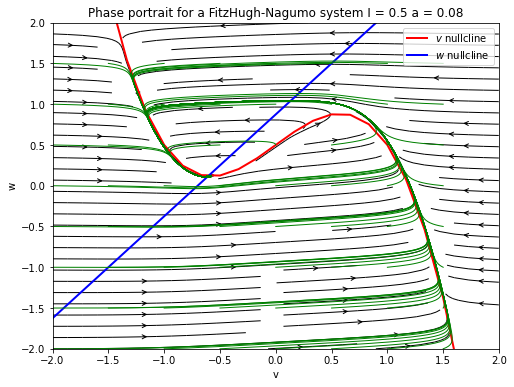

[(-0.606705831381115, 0.116617710773606), (0.303352915690557 - 0.725306124594221*I, 1.2541911446132 - 0.906632655742776*I), (0.303352915690557 + 0.725306124594221*I, 1.2541911446132 + 0.906632655742776*I)]


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sym

# 1.2

#initial value
I = 0.5
a = 0.7
b = 0.8
tau = 12.5

# Diff equations
def dX_dt(X, t=0):
    v, w = X
    dv_dt = v - (v**3) - w + I
    dw_dt = (v + a - b * w) / tau
    return np.array([dv_dt, dw_dt])

# range of v and w
v = np.linspace(-2, 2, 25)
w = np.linspace(-2, 2, 25)

# create a meshgrid
V, W = np.meshgrid(v, w)

# calculate the field vectors
dv_dt, dw_dt = dX_dt([V, W])
fig, ax = plt.subplots(figsize=(8, 6))

# plot the direction fields
ax.streamplot(V, W, dv_dt, dw_dt, color='black', linewidth=1, arrowsize=1, arrowstyle='->')

# plot the nullclines
v_nullcline = v -  (v**3) +I 
w_nullcline = (1/b)*v+a/b
ax.plot(v, v_nullcline, 'r-', lw = 2, label=r'$v$ nullcline')
ax.plot(v, w_nullcline, 'b-', lw = 2, label=r'$w$ nullcline')
t = np.linspace(0, 250, 10000)

# plot the solutions
for v0 in np.arange(-2, 2, .5):
    for w0 in np.arange(-2, 2, .5):
        X0 = np.array([v0, w0])  # set initial value
        X = odeint(dX_dt, X0, t)  # solve ODE
        ax.plot(X[:, 0], X[:, 1], 'g-', lw=1)  # plot solution

ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))
ax.set_xlabel('v')
ax.set_ylabel('w')
ax.set_title('Phase portrait for a FitzHugh-Nagumo system I = ' + str(I)+' a = '+str(1/tau))
ax.legend()
plt.show()

# 1.3
x = sym.symbols('x')
y = sym.symbols('y')

eq1 = sym.Eq(y, x -  (x**3) +I)
eq2 = sym.Eq(y,  (1/b)*x+a/b)
sol = sym.solve((eq1,eq2), (x, y))
print(sol)

In [ ]:
from sympy import *
# 1.3
#initial value
I = 0.3
a = 0.7
b = 0.8
tau = 12.5

v = symbols('v')
A, B, C, D= symbols('A, B, C, D')
A=1
B=0
C =-1+1/b
D=-I+a/b

eq = Eq(A*v**3 +B*v**2 + C*v + D, 0)

soln = solve(eq, v)

print(soln)

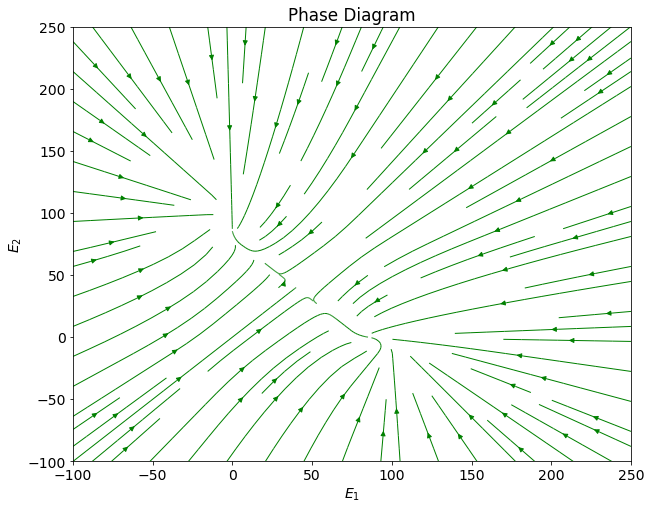

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sym

# 2.1.1
#initial value
tau = 20
N = 2
M = 100
sigma = 120
k_1 = 120
k_2 = 120

# S(x) equation 
def S(x, M, N, sigma):
    y = np.where(x >= 0, M * x**N / (sigma + x**N), 0)
    return y

# Diff equations
def dX_dt(X, t=0):
    E_1, E_2 = X
    dE_1_dt = (-E_1 + S(k_1 -3*E_2, M, N, sigma))/tau
    dE_2_dt = (-E_2 +S(k_2 -3*E_1, M, N, sigma))/tau
    return np.array([dE_1_dt, dE_2_dt])

#define the range of values for the phase plane
E_1_range = np.linspace(-100,250,5)
E_2_range = np.linspace(-100,250,5)


#calculate the state space
X1, X2 = np.meshgrid(E_1_range, E_2_range)
DX_1, DX_2 = dX_dt(X=[X1, X2])

#define the figure size and font size
fig = plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 14})

#plot the arrows
plt.streamplot(X1, X2, DX_1, DX_2, color='g', linewidth=1, cmap='winter')

#label the axis and set the limits
plt.xlabel("$E_1$")
plt.ylabel("$E_2$")
plt.xlim([-100,250])
plt.ylim([-100,250])

#Title
plt.title("Phase Diagram")

#display the plot
plt.show()

[(20, 20), (-956/13 + 21*(80 - 40*I)**3/26000 + 808*I/13 - 67*(80 - 40*I)**2/5200 - (80 - 40*I)**4/160000, 80 - 40*I), (-956/13 - (80 + 40*I)**4/160000 - 67*(80 + 40*I)**2/5200 - 808*I/13 + 21*(80 + 40*I)**3/26000, 80 + 40*I), (-808*sqrt(51)/169 - (40*sqrt(51)/13 + 320/13)**4/160000 - 67*(40*sqrt(51)/13 + 320/13)**2/5200 + 2116/169 + 21*(40*sqrt(51)/13 + 320/13)**3/26000, 40*sqrt(51)/13 + 320/13), (-67*(320/13 - 40*sqrt(51)/13)**2/5200 - (320/13 - 40*sqrt(51)/13)**4/160000 + 21*(320/13 - 40*sqrt(51)/13)**3/26000 + 2116/169 + 808*sqrt(51)/169, 320/13 - 40*sqrt(51)/13)]


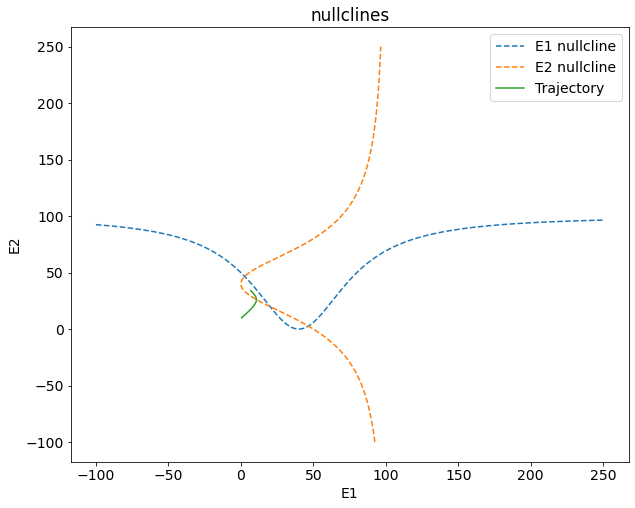

In [11]:
from scipy.integrate import odeint 
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

def wta_network(E, t, k1, k2, si, M, N, tau):
    E1, E2 = E[0], E[1]
    
    dE1_dt = (1/tau) * ((M*(k1-3*E2)**N)/(si**N+(k1-3*E2)**N) - E1)
    dE2_dt = (1/tau) * ((M*(k2-3*E1)**N)/(si**N+(k2-3*E1)**N) - E2)
    
    return [dE1_dt, dE2_dt]
def nullcline_wta(E, k, si, M, N):
    return (M * (k - 3 * E)**N) / (si**N + (k - 3 * E)**N)

# parameters
k1 = 120
k2 = 120
si = 120
M = 100
N = 2
tau = 20

# time points to plot
t = np.linspace(0, 40, 5000)

#define the figure size and font size
fig = plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 14})       
        
# Plot nullclines
E_range = np.linspace(-100, 250, 5000)
plt.plot(E_range, nullcline_wta(E_range, k1, si, M, N), label="E1 nullcline", linestyle='--')
plt.plot(nullcline_wta(E_range, k2, si, M, N), E_range, label="E2 nullcline", linestyle='--')

# initial conditions
E0 = [0.5,10]
# Solve ODEs
sol = odeint(wta_network, E0, t, args=(k1, k2, si, M, N, tau))
# Plot trajectories
plt.plot(sol[:, 0], sol[:, 1], label="Trajectory")

# Add axis labels and legend
plt.title('nullclines')
plt.xlabel('E1')
plt.ylabel('E2')
plt.legend()

# 2.3
E1 = sym.symbols('E1')
E2 = sym.symbols('E2')
eq1 = sym.Eq(E1,nullcline_wta(E2, k1, si, M, N))
eq2 = sym.Eq(E2,nullcline_wta(E1, k2, si, M, N))
sol = sym.solve((eq1,eq2), (E1, E2))
print(sol)

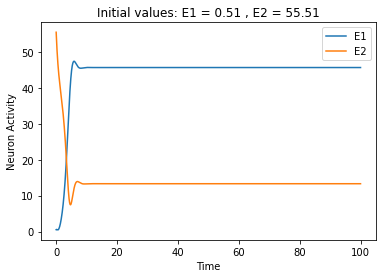

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
#2.2
E1_0 = 0.51
E2_0 = 55.51
N = 2
M = 100
tau = 20
si = 120
k1 = 150
k2 = 90
t_start = 0.0
t_end = 100.0
dt = 0.01
t = np.arange(t_start, t_end, dt)

def wta_system(y, t):
    E1, E2 = y
    dE1dt = (M * (k1 - 3*E2)**N) / (si**N + (k1 - 3*E2)**N) - E1
    dE2dt = (M * (k2 - 3*E1)**N) / (si**N + (k2 - 3*E1)**N) - E2
    return [dE1dt, dE2dt]

 # solve ODE
sol = odeint(wta_system, [E1_0, E2_0], t)
E1 = sol[:, 0]
E2 = sol[:, 1]
plt.plot(t, E1, label='E1')
plt.plot(t, E2, label='E2')
plt.xlabel('Time')
plt.ylabel('Neuron Activity')
plt.title('Initial values: E1 = '+str(E1_0) + ' , E2 = '+str(E2_0))
plt.legend()
plt.show()


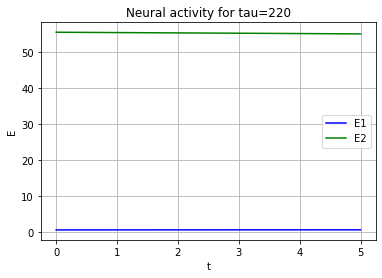

In [9]:
import numpy as np
from scipy.integrate import odeint

def neural_activity(y, t, tau, N, M, si, k1, k2):
    E1, E2 = y
    dE1dt = (M * (k1 - 3 * E2)**N) / (si**N + (k1 - 3 * E2)**N) - E1
    dE2dt = (M * (k2 - 3 * E1)**N) / (si**N + (k2 - 3 * E1)**N) - E2
    dydt = [dE1dt/tau, dE2dt/tau]
    return dydt

# Initial conditions
E10 = 0.51
E20 = 55.51
E0 = [E10, E20]

# Time points
t = np.linspace(0, 5, 1000)

# Parameters
tau = 220
N = 2
M = 100
si = 120
k1 = 150
k2 = 90

# Solve the ODEs for tau=20
sol = odeint(neural_activity, E0, t, args=(tau, N, M, si, k1, k2))

# Plot the results for tau=20
import matplotlib.pyplot as plt
plt.plot(t, sol[:, 0], 'b', label='E1')
plt.plot(t, sol[:, 1], 'g', label='E2')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('E')
plt.title('Neural activity for tau='+str(tau))
plt.grid()
plt.show()